In [14]:
from keras.layers import Input, Dense
from keras.models import Model

In [17]:
encoding_dim = 32

In [18]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

In [19]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [20]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [21]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [23]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 0.3662 - val_loss: 0.2723
Epoch 2/50
60000/60000 [==============================] - 2s - loss: 0.2647 - val_loss: 0.2535
Epoch 3/50
60000/60000 [==============================] - 2s - loss: 0.2431 - val_loss: 0.2303
Epoch 4/50
60000/60000 [==============================] - 2s - loss: 0.2223 - val_loss: 0.2121
Epoch 5/50
60000/60000 [==============================] - 2s - loss: 0.2069 - val_loss: 0.1991
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 0.1958 - val_loss: 0.1898
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 0.1876 - val_loss: 0.1827
Epoch 8/50
60000/60000 [==============================] - 2s - loss: 0.1809 - val_loss: 0.1764
Epoch 9/50
60000/60000 [==============================] - 2s - loss: 0.1752 - val_loss: 0.1711
Epoch 10/50
60000/60000 [==============================] - 2s - loss: 0.1701 - val_loss: 0.1663

In [26]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))

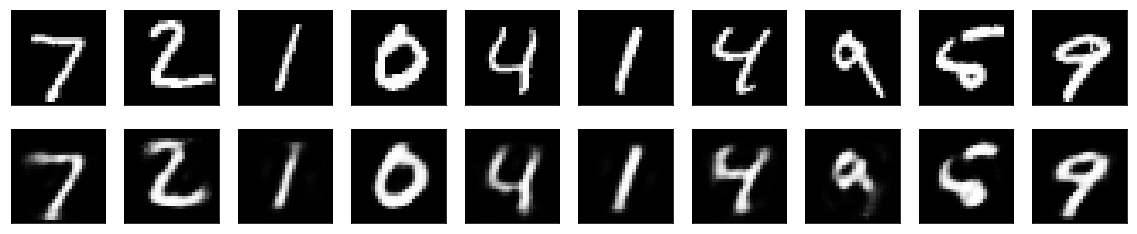

In [27]:
for i in range(n):
	#顯示原圖
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
	#顯示重構的圖片
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
